# 1. Setup and Data

#### 1.1 Install lib

In [2]:
!pip install labelme tensorflow tensorflow-gpu opencv-python matplotlib albumentations

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached albumentations-1.3.1-py3-none-any.whl (125 kB)
  Using cached tensorflow_intel-2.12.0-cp310-cp310-win_amd64.whl (272.8 MB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached opencv_python_headless-4.8.0.76-cp37-abi3-win_amd64.whl (38.0 MB)
  Using cached qudida-0.0.4-py3-none-any.whl (3.5 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\Adarsh\AppData\Local\Temp\pip-install-ufhz1zgm\tensorflow-gpu_942a1907c79a4843879d9f025aa831d2\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did no

#### 1.2 Collect images using Opencv

In [3]:
import os
import time # to detect even is we move around
import uuid # for unique identity
import cv2

In [4]:
uuid.uuid1() # prevents using image 1, image2 and so on

UUID('5a01b3b8-3a12-11ee-bec5-70a8d31acf47')

#### 1.3 Annotate Images with labelme

In [5]:
IMAGE_PATH = os.path.join('data', 'images')  #inside data, inside folder images
number_img = 30

In [6]:
for image_num in range(30):
    print(image_num)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [39]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_img):
    print('Collecting image {} '.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGE_PATH, f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
    

In [40]:
! pip install labelme

## 2. Review dataset and build image loading function

##### 2.1 Import TF and Deps

In [9]:
import tensorflow as tf
import cv2
import json
import numpy as np
from matplotlib import pyplot as plt

##### 2.2 Limiting GPU memory growth

In [10]:
# Avoid OOM errors by setting GPU Memory Consumption growth
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [11]:
!pip install jupyterlab tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\Adarsh\AppData\Local\Temp\pip-install-h9x6lu2j\tensorflow-gpu_9525731eecf34c4cb69f4e373aafca82\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did no

In [12]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

##### 2.3 Load images into TF data pipeline

In [21]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg', shuffle = False)

In [22]:
images.as_numpy_iterator().next()

b'data\\images\\0027450c-39c6-11ee-badf-70a8d31acf47.jpg'

In [23]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img


In [24]:
images = images.map(load_image)

In [25]:
images.as_numpy_iterator().next()

array([[[ 40,  51,  53],
        [ 44,  55,  57],
        [ 43,  54,  58],
        ...,
        [101, 106, 109],
        [ 97, 106, 105],
        [ 97, 106, 105]],

       [[ 41,  51,  53],
        [ 44,  55,  57],
        [ 45,  54,  59],
        ...,
        [101, 106, 109],
        [ 99, 107, 109],
        [ 99, 108, 107]],

       [[ 42,  49,  55],
        [ 43,  52,  57],
        [ 44,  51,  57],
        ...,
        [ 99, 107, 109],
        [100, 108, 110],
        [101, 109, 111]],

       ...,

       [[ 19,  27,  48],
        [ 20,  28,  49],
        [ 22,  30,  51],
        ...,
        [ 50,  32,  28],
        [ 51,  32,  28],
        [ 51,  32,  28]],

       [[ 18,  26,  45],
        [ 20,  28,  47],
        [ 21,  32,  52],
        ...,
        [ 52,  33,  29],
        [ 52,  33,  29],
        [ 52,  33,  29]],

       [[ 19,  27,  46],
        [ 23,  31,  50],
        [ 25,  36,  56],
        ...,
        [ 52,  33,  29],
        [ 52,  33,  29],
        [ 52,  33,  29]]

In [27]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

##### 2.4 View raw images with matplotlib

In [36]:
image_generator = images.batch(4).as_numpy_iterator()   # returns images in batch of 4

In [37]:
plot_images = image_generator.next() # next to get next batch

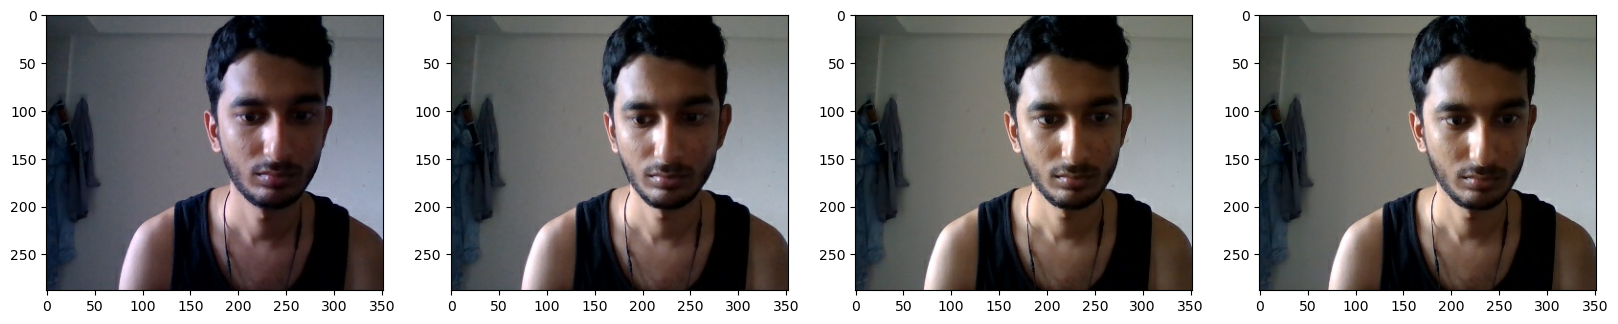

In [38]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

## 3. Partition Unaugmented Data

##### 3.1 Manually spli data into train, test and validation 

###### Move and match labels

In [43]:
for folder in ['train', 'test', 'val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data', 'labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data', folder, 'labels', filename)
            os.replace(existing_filepath, new_filepath)

### 4. Apply image augmentation on images and labels using albumentations 

##### setup albumentations

In [76]:
import albumentations as alb


In [190]:
augmentor = alb.Compose([alb.RandomCrop(width=288, height=288),  #RandomCrop is the trickiest thing to handle
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5),
                        ],  #VerticalFlip is the trickiest thing to handle
                         bbox_params = alb.BboxParams(format='albumentations',
                                                      label_fields=['class_labels']),
                       )

In [203]:
img = cv2.imread(os.path.join('data', 'train', 'images', '103b75d2-39c6-11ee-8e11-70a8d31acf47.jpg'))
img

array([[[123, 120, 116],
        [123, 120, 116],
        [122, 121, 117],
        ...,
        [149, 152, 150],
        [149, 153, 148],
        [148, 152, 147]],

       [[123, 120, 116],
        [122, 121, 117],
        [122, 121, 117],
        ...,
        [149, 152, 150],
        [149, 153, 148],
        [148, 152, 147]],

       [[120, 120, 114],
        [121, 121, 115],
        [123, 123, 117],
        ...,
        [144, 149, 147],
        [145, 151, 146],
        [145, 151, 146]],

       ...,

       [[102,  84,  61],
        [100,  82,  59],
        [100,  82,  59],
        ...,
        [201, 190, 186],
        [201, 190, 186],
        [200, 189, 185]],

       [[ 99,  83,  60],
        [ 97,  81,  58],
        [ 97,  80,  59],
        ...,
        [198, 186, 184],
        [197, 185, 183],
        [197, 185, 183]],

       [[ 96,  80,  57],
        [ 91,  75,  52],
        [ 87,  70,  49],
        ...,
        [195, 183, 181],
        [195, 183, 181],
        [194, 182, 180]]

In [204]:
with open(os.path.join('data', 'train', 'labels', '103b75d2-39c6-11ee-8e11-70a8d31acf47.json'), 'r') as f:
    label = json.load(f)

In [205]:
type(label)

dict

In [206]:
type(label['shapes'])

list

In [207]:
label['shapes'][0]

{'label': 'face',
 'points': [[118.38410596026489, 43.337748344370866],
  [226.33112582781456, 204.26490066225165]],
 'group_id': None,
 'description': '',
 'shape_type': 'rectangle',
 'flags': {}}

#### 4.2 Extract coordinates and rescale to match image resolution

In [208]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [209]:
coords

[118.38410596026489,
 43.337748344370866,
 226.33112582781456,
 204.26490066225165]

In [210]:
coords = list(np.divide(coords, [640, 480, 640, 480]))
coords

[0.18497516556291388,
 0.09028697571743931,
 0.3536423841059603,
 0.42555187637969094]

In [211]:
the_class_labels = ['face']

##### 4.3 Apply augmentations

In [212]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=class_labels)
augmented

{'image': array([[[158, 156, 131],
         [158, 157, 135],
         [160, 159, 137],
         ...,
         [145, 142, 120],
         [144, 141, 119],
         [146, 141, 119]],
 
        [[159, 157, 132],
         [158, 157, 135],
         [159, 158, 136],
         ...,
         [146, 143, 121],
         [144, 141, 119],
         [146, 141, 119]],
 
        [[158, 157, 135],
         [157, 158, 135],
         [158, 159, 136],
         ...,
         [146, 143, 121],
         [145, 142, 120],
         [145, 142, 120]],
 
        ...,
 
        [[ 44,  59,  61],
         [ 45,  60,  62],
         [ 46,  60,  65],
         ...,
         [109,  98,  75],
         [110,  96,  69],
         [116, 100,  70]],
 
        [[ 42,  59,  61],
         [ 43,  60,  62],
         [ 45,  59,  64],
         ...,
         [103,  94,  70],
         [103,  88,  64],
         [107,  90,  62]],
 
        [[ 42,  59,  61],
         [ 43,  60,  62],
         [ 42,  58,  63],
         ...,
         [100,  90,

In [213]:
augmented['bboxes']

[(0.605964863870493,
  0.09028697571743931,
  0.8121136865342163,
  0.42555187637969094)]

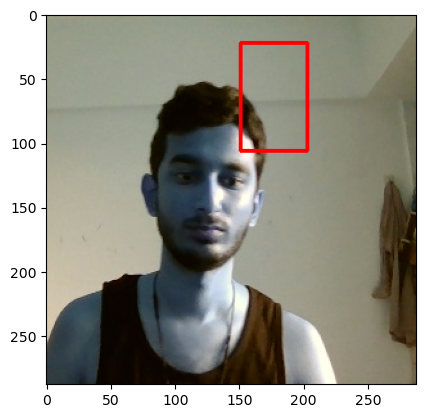

In [214]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [250,250]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [250,250]).astype(int)),
                  (255,0,0), 2)
plt.imshow(augmented['image'])

## 5. Build and run augmentation Pipeline

##### 5.1 Run Augmentation Pipeline

In [221]:
for partition in ['train', 'test', 'val']:
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))
        
        coords = [0, 0, 0.00001, 0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label=json.load(f)
                
            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640, 480, 640, 480]))  # these poinst might cause problem
                          
        try:
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])
                          
                annotation={}
                annotation['image']=image
                          
                if os.path.exists(label_path):
                    if len(augmented['bboxes'])== 0:
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class']=0
                                  
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class']=1
                else:
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class']=0
                          
                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)
        except Exception as e:
                          print(e)

[Errno 2] No such file or directory: 'aug_data\\train\\labels\\0027450c-39c6-11ee-badf-70a8d31acf47.0.json'
[Errno 2] No such file or directory: 'aug_data\\train\\labels\\00769c20-39c6-11ee-b829-70a8d31acf47.0.json'
[Errno 2] No such file or directory: 'aug_data\\train\\labels\\00c7e85c-39c6-11ee-8c8b-70a8d31acf47.0.json'
[Errno 2] No such file or directory: 'aug_data\\train\\labels\\01192f5a-39c6-11ee-8bad-70a8d31acf47.0.json'
[Errno 2] No such file or directory: 'aug_data\\train\\labels\\016a3e36-39c6-11ee-a9c0-70a8d31acf47.0.json'
[Errno 2] No such file or directory: 'aug_data\\train\\labels\\01b97003-39c6-11ee-9161-70a8d31acf47.0.json'
[Errno 2] No such file or directory: 'aug_data\\train\\labels\\020879a3-39c6-11ee-94ea-70a8d31acf47.0.json'
[Errno 2] No such file or directory: 'aug_data\\train\\labels\\02ab437b-39c6-11ee-aca1-70a8d31acf47.0.json'
[Errno 2] No such file or directory: 'aug_data\\train\\labels\\02fae823-39c6-11ee-af5d-70a8d31acf47.0.json'
[Errno 2] No such file or di

In [222]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images=train_images.map(load_image)
train_images=train_images.map(lambda x: tf.image.resize(x, (120, 120)))
train_images=train_images.map(lambda x:x/255)

InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: aug_data\\train\\images\\*.jpg'

In [223]:
test_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
test_images=test_images.map(load_image)
test_images=test_images.map(lambda x: tf.image.resize(x, (120, 120)))
test_images=test_images.map(lambda x:x/255)

InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: aug_data\\train\\images\\*.jpg'

In [225]:
val_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
val_images=val_images.map(load_image)
val_images=val_images.map(lambda x: tf.image.resize(x, (120, 120)))
val_images=val_images.map(lambda x:x/255)

InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: aug_data\\train\\images\\*.jpg'

## 6. Prepare Labels

##### 6.1 Build label loading function

In [226]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
    return [label['class']], label['bbox']

##### 6.2 load data to tensorflow dataset



In [228]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.unit8, tf.float16]))

InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: aug_data\\train\\images\\*.jpg'

In [229]:
test_labels = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.unit8, tf.float16]))

InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: aug_data\\train\\images\\*.jpg'

In [230]:
val_labels = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.unit8, tf.float16]))

InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: aug_data\\train\\images\\*.jpg'

In [232]:
train_labels.as_numpy_iterator().next()

NameError: name 'train_labels' is not defined

## 7. Combine label and images samples

##### 7.1 Check partition length

In [233]:
len(train_images), len(train_labels), len(test_images), len(tets_labels), len(val_images), len(val_lables)

NameError: name 'train_images' is not defined

In [237]:
train=tf.data.Dataset.zip((train_images, train_labels))
train=train.shuffle(5000)
train=train.batch(8)
train=train.prefetch(4)

NameError: name 'train_images' is not defined

In [238]:
test=tf.data.Dataset.zip((test_images, test_labels))
test=test.shuffle(1300)
test=test.batch(8)
test=test.prefetch(4)

NameError: name 'test_images' is not defined

In [239]:
val=tf.data.Dataset.zip((val_images, val_labels))
val=val.shuffle(1000)
val=val.batch(8)
val=val.prefetch(4)

NameError: name 'val_images' is not defined

In [240]:
train.as_numpy_iterator().next()[1]

NameError: name 'train' is not defined

##### 7.3 View images and annotations

In [241]:
data_samples = train.as_numpy_iterators()

NameError: name 'train' is not defined

In [242]:
res= data_samples.next()

NameError: name 'data_samples' is not defined

NameError: name 'res' is not defined

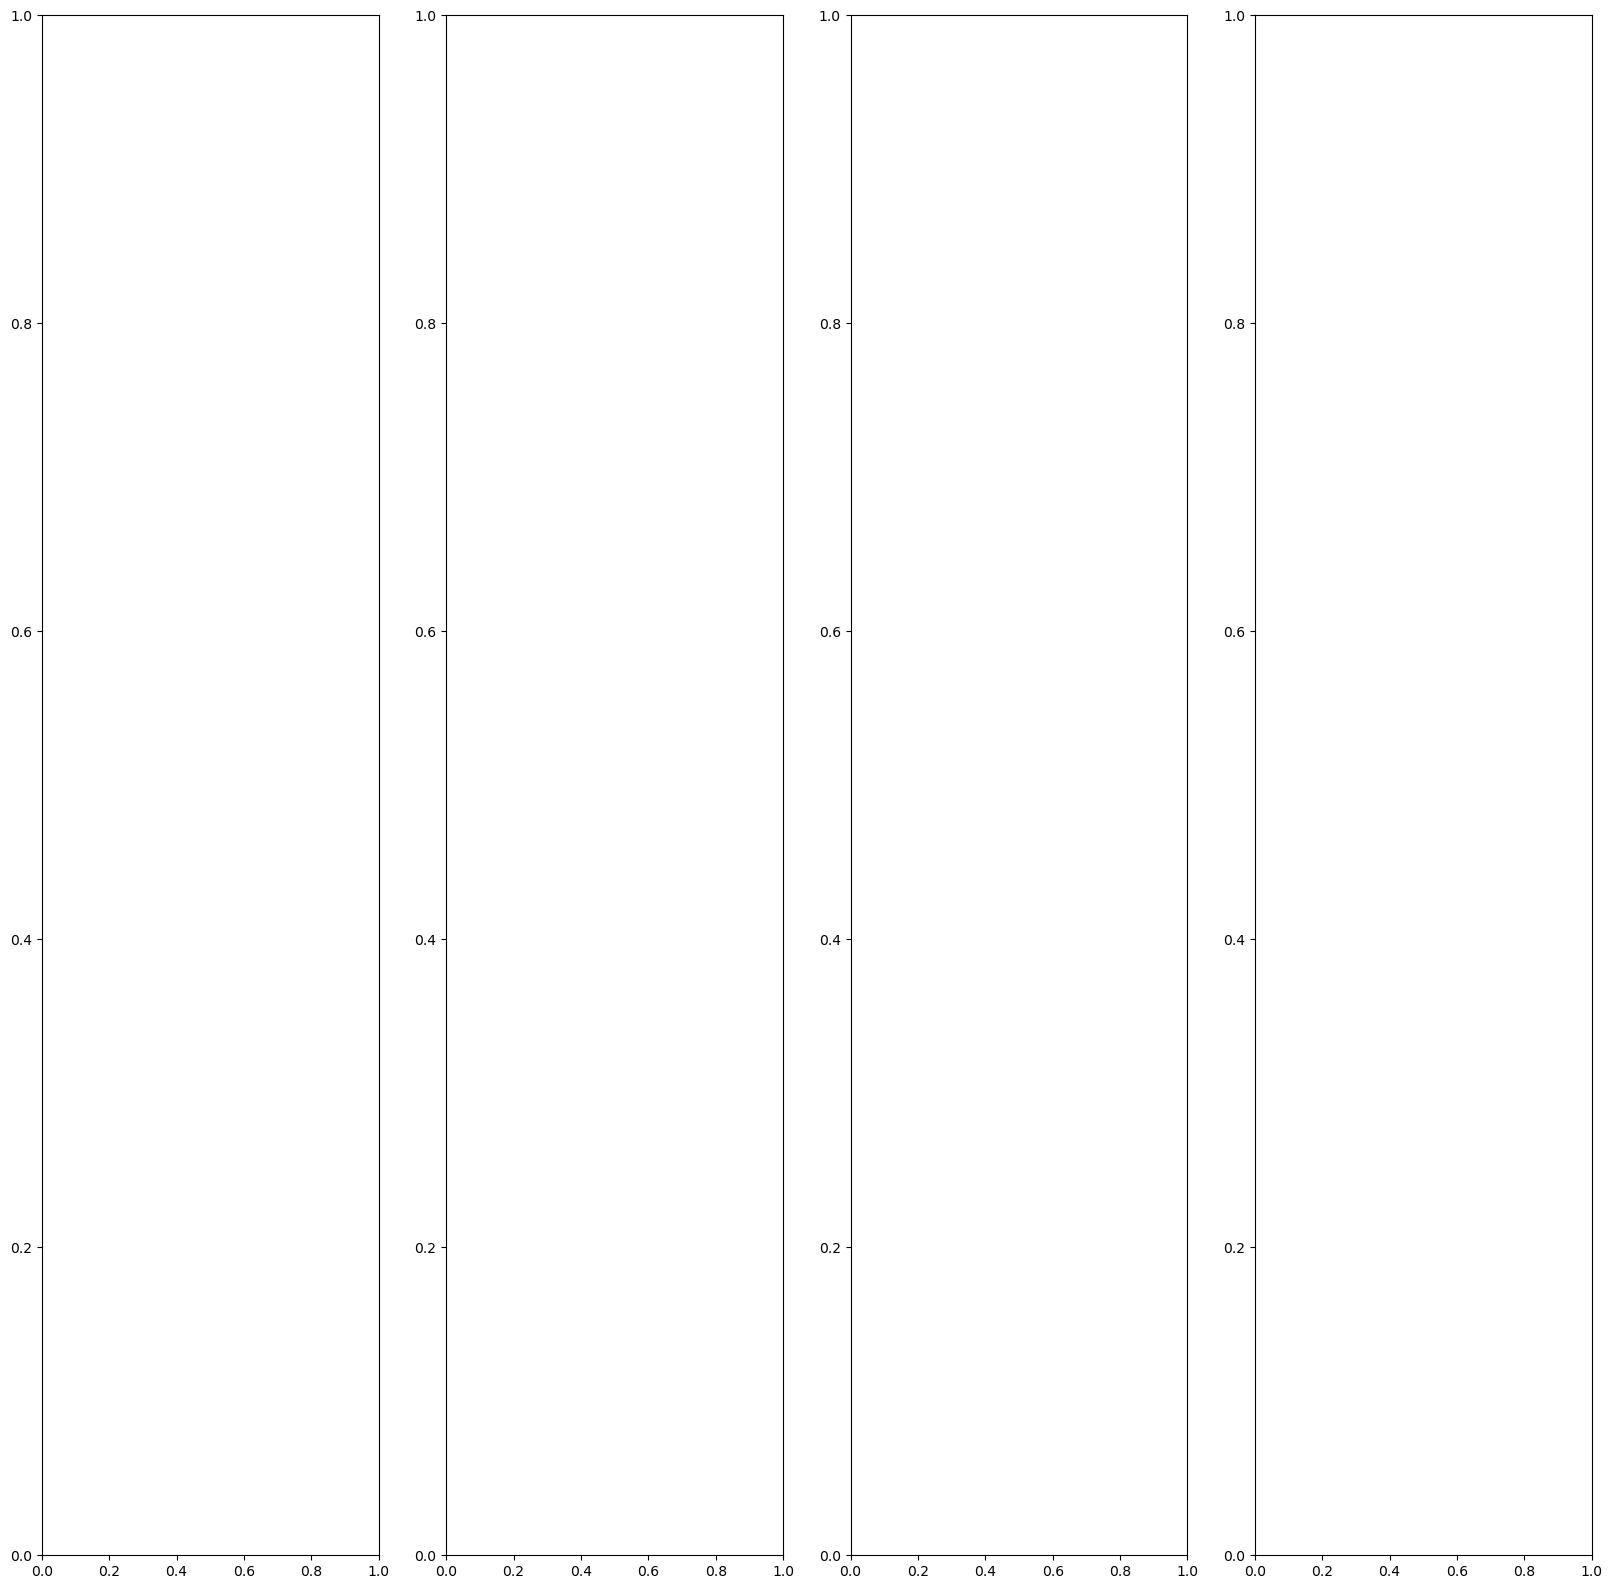

In [243]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx in range(4):
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int)),
                  (255, 0, 0), 2)
    ax[idx].imshow(sample_image)

## 8. Deep learning using the functional API

##### 8.1 import layers 

In [247]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16


##### 8.2 Download VGG16

In [248]:
vgg = VGG16(include_top=False)

58889256/58889256 [==============================] - 8s 0us/step


In [249]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

##### 8.2 Building instance of network

In [255]:
def build_model():
    input_layer = Input(shape=(120, 120, 3))
    vgg = VGG16(include_top=False)(input_layer)
    #classification model
    f1=GlobalMaxPooling2D()(vgg)
    class1=Dense(2048, activation='relu')(f1)
    class2=Dense(1, activation='sigmoid')(class1)
    
    #bounding box model
    f2=GlobalMaxPooling2D()(vgg)
    regress1=Dense(2048, activation='relu')(f2)
    regress2=Dense(4, activation='sigmoid')(regress1)
    
    facetracker=Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [256]:
train.as_numpy_iterator().next()[1]

NameError: name 'train' is not defined

In [257]:
facetracker=build_model()

In [258]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [259]:
X, y = train.as_numpy_iterator().next()

NameError: name 'train' is not defined

In [263]:
X.shape

NameError: name 'X' is not defined

In [261]:
y

NameError: name 'y' is not defined

In [264]:
classes, coords = facetracker.predict(X)

NameError: name 'X' is not defined

In [265]:
classes, coords

NameError: name 'classes' is not defined

## 9. Define losses and Optimizers

##### 9.1 Define Optimizer and LR

In [267]:
len(train)

NameError: name 'train' is not defined

In [272]:
batches_per_epoch = len(train)
lr_decay = (1./0.75-1)/batches_per_epoch

NameError: name 'train' is not defined

In [273]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

NameError: name 'lr_decay' is not defined

##### 9.2 Create localization and classification loss

In [274]:
def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:, :2] - yhat[:, :2]))
    
    h_true = y_true[:, 3] - y_true[:, 1]
    w_true = y_true[:, 2] - y_true[:, 0]
    
    h_pred = yhat[:, 3] - yhat[:, 1]
    w_pred = yhat[:, 2] - yhat[:, 0]
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true - h_pred))
    
    return delta_coord + delta_size

In [275]:
classloss=tf.keras.losses.BinaryCrossentropy()
regressloss=localization_loss

##### 9.3 Test loss metrics

In [278]:
localization_loss(y[1], coords)

NameError: name 'y' is not defined

In [279]:
classloss(y[0], classes)

NameError: name 'y' is not defined

In [280]:
regressloss(y[1], coords)

NameError: name 'y' is not defined

## 10. Train Neural networks

##### 10.1 Create custom model class

In [ ]:
class FaceTracker(Model):
    def __init__(self, eyetracker, **kwargs):
        super().__init__(**kwargs)
        sel.model=eyetracker
    
    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs=classloss
        self.lloss=localizationloss
        self.opt=opt
    def train_step(self, batch, **kwargs):
        X, y = batch
        
        with tf.GradientTape() as tape:
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss + 0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"Total loss":total_loss, "class loss":batch_classloss, "Regression loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs):
        X, y = batch
        classes, coords = self.model(X, training=False)
        batch_classloss=self.closs(y[0], classes)
        batch_regressloss=self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss + 0.5*batch_classloss
        
        return {"Total loss":total_loss, "class loss":batch_classloss, "Regression loss":batch_localizationloss}

In [282]:
model=FaceTracker(facetracker)

NameError: name 'FaceTracker' is not defined

In [283]:
model.compile(opt, classloss, regressloss)

NameError: name 'model' is not defined

##### 10.2 Train

In [284]:
logdir = 'logs'

In [286]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [287]:
hist = model.fit(train, epochs=40, validation_data=val, callbacks=[tensorboard_callback])

NameError: name 'model' is not defined

In [303]:
hist.history

NameError: name 'hist' is not defined

NameError: name 'hist' is not defined

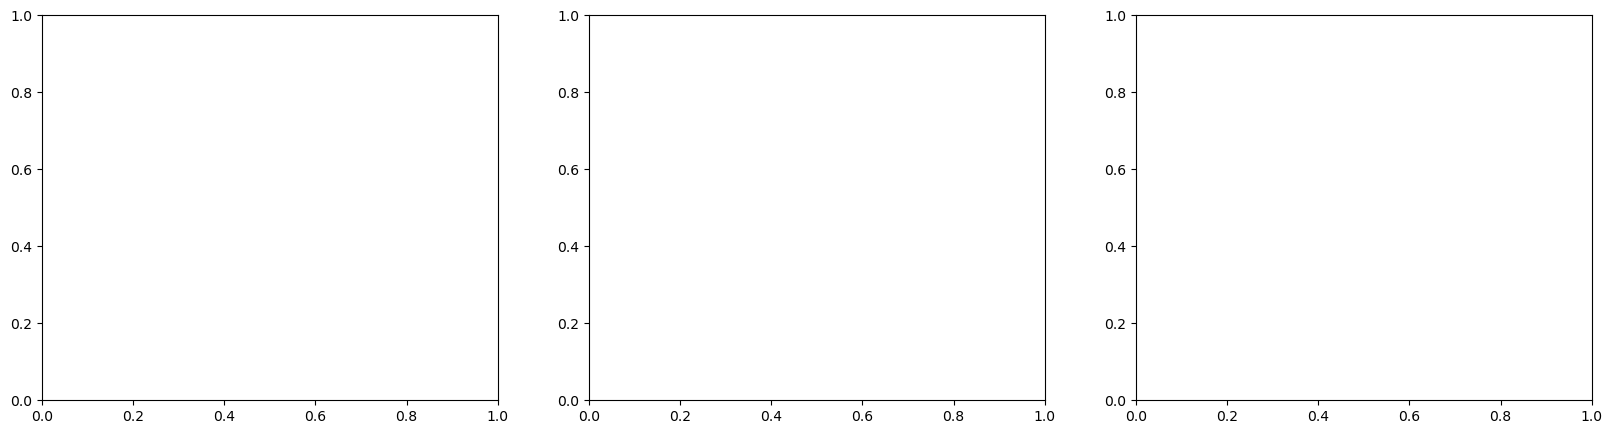

In [304]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['total_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_total_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

## 11. Make Prediction

##### 11.1 Make Predictions on Test Set

In [305]:
test_data = test.as_numpy_iterator()

NameError: name 'test' is not defined

In [306]:
test_sample = test_data.next()

NameError: name 'test_data' is not defined

In [309]:
yhat=facetracker.predict(test_sample[0])

NameError: name 'test_sample' is not defined

In [310]:
fig, ax = plt.subplot(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.5:
        cv2.rectangle(sample_image,
                      tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int)),
                      (255,0,0), 2)
    ax[idx].imshow(sample_image)

TypeError: subplot() got an unexpected keyword argument 'ncols' and/or 'nrows'.  Did you intend to call subplots()?

##### 11.2 Save the model

In [312]:
from tensorflow.keras.models import load_model


In [313]:
facetracker.save('facetracker.h5')

C:\Users\Adarsh\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 12. Real time face detection

In [315]:
cap=cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame=frame[50:500, 50:500, :]
    
    rgb=cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized=tf.image.resize(rgb, (120, 120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255, 0))
    sample_coords=yhat[1][0]
    
    if yhat[0] > 0.5:
        # controls main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450, 450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450, 450]).astype(int)),
                      (255,0,0), 2)
        # controls the label rectangle 
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450, 450]).astype(int),
                      [0, -30])),
                      tuple(np.add(np.multiply(sample_coords[2:], [450, 450]).astype(int),
                      [80, 0])),
                      (255,0,0), -1)
        # controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450, 450]).astype(int),
                                               [0, -5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.imshow('EyeTrack', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroAllWindows()

1/1 [==============================] - 0s 74ms/step



KeyboardInterrupt

